In [9]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import itertools as itr

In [10]:
beta=0.5
J=-1.0
x=20
y=20
steps=1600000
d=0.5
Ns=10
s=np.ones((x,y))
l=np.array(range(x*y))

In [11]:
def initiate():
    np.random.shuffle(l)
    for n in range(math.floor(d*len(l))):
        i=l[n]%y
        j=l[n]//x
        s[i][j]=-1

In [12]:
def exchange(r1,r2):
    s[l[r1]%y][l[r1]//x],s[l[r2]%y][l[r2]//x]=s[l[r2]%y][l[r2]//x],s[l[r1]%y][l[r1]//x]
    l[r1],l[r2]=l[r2],l[r1]

In [13]:
def nearest_neighbour(r):
    nn=list()
    if r>=x:
        nn.append(r-x)

    if r<x*(y-1):
        nn.append(r+x)

    if (r%y)==0:
        nn.append(r+x-1)
    else:
        nn.append(r-1)
        
    if ((r+1)%y)==0:
        nn.append(r-x+1)
    else:
        nn.append(r+1)
        
    return nn 

In [14]:
def density_calculation():
    for j in range(y):
        density[j]+=(s[:,j].sum())

In [15]:
def plot_density():
    d1=np.zeros(y)
    if density[0]<0:
        for o in range(y):
            d1[math.floor((o+y/2))%y]=density[o]
    else:
        d1=density
    plt.plot(d1[:]/(steps*x))

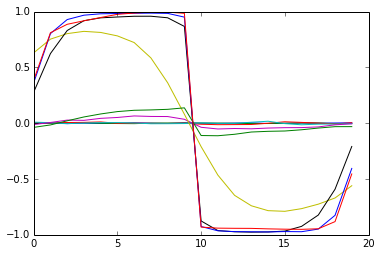

In [16]:
for bs in range(Ns):
    density=np.zeros(y)
    s=np.ones((x,y))
    l=np.array(range(x*y))
    initiate()
    beta=bs/Ns
    for t in range(steps):
        R1=np.random.randint(x*y*(d))
        R2=math.floor(x*y*d)+np.random.randint(x*y*(1-d))
        rand1=l[R1]
        rand2=l[R2]
        exchange(R1,R2)
        nn1=nearest_neighbour(rand1)
        nn2=nearest_neighbour(rand2)
        S=0
        for o in range(len(nn1)):
            i=nn1[o]%y
            j=nn1[o]//x
            S+=s[i][j]
            
        E=2*J*s[rand1%y][rand1//x]*S
        S=0
        
        for o in range(len(nn2)):
            i=nn2[o]%y
            j=nn2[o]//x
            S+=s[i][j] 
            
        E+=(2*J*s[rand2%y][rand2//x]*S)
        if E>0:
            p=random.uniform(0,1)
            if p>np.exp(-beta*E):
                exchange(R1,R2)
        density_calculation()
    plot_density()